In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Reading & Observing Data

In [62]:
df = pd.read_csv('titanic_train_1.csv')
#df.tail()
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


# Data Cleaning

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in data sets. It involves checking data for completeness, removing duplicate entries, dealing with missing data, standardizing data formats, and correcting data values that are out of range or invalid.

# Importance of Data Cleaning

1. Accurate data is essential for making informed decisions: If the data is incorrect, any insights or conclusions drawn from it may be flawed.

2. Data cleaning can help identify and prevent errors early on: This can save time and resources by avoiding costly mistakes downstream.

3. Data cleaning can improve the quality of data: By removing errors and inconsistencies, data becomes more reliable and trustworthy.

4. Data cleaning can improve the efficiency of data analysis: With clean data, analysts can spend more time analysing data and less time correcting errors.

In [66]:
# Here we are droping irrelavent columns from dataset
df.drop(['PassengerId', 'Name', 'Ticket', "Fare"], inplace=True, axis=1)

In [68]:
df.head()

,Survived,Pclass,Gender,Age,Cabin
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C85
2,1,3,female,26.0,NaN
3,1,1,female,35.0,C123
4,0,3,male,35.0,NaN


In [70]:
# Want to see how many unique values are availiable into Survived column.
df['Survived'].unique()

array([0, 1], dtype=int64)

In [72]:
# Want to see how many unique values are availiable into Age column.
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

# Handling Missing / Null Values

In [74]:
df.head()

,Survived,Pclass,Gender,Age,Cabin
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C85
2,1,3,female,26.0,NaN
3,1,1,female,35.0,C123
4,0,3,male,35.0,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   Cabin     204 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [78]:
df.isnull()

,Survived,Pclass,Gender,Age,Cabin
0,False,False,False,False,True
1,False,False,False,False,False
2,False,False,False,False,True
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
886,False,False,False,False,True
887,False,False,False,False,False
888,False,False,False,True,True
889,False,False,False,False,False


<Axes: >

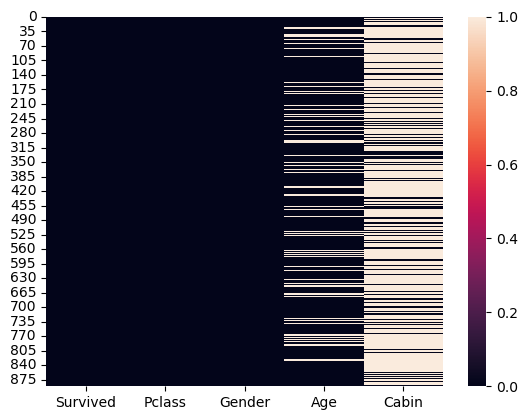

In [80]:
sns.heatmap(df.isnull())

In [35]:
print(df.isnull().sum())
# => This gives the idea about columns that contain null values
# and how many of them are null.

Survived      0
Pclass        0
Gender        0
Age         177
Cabin       687
dtype: int64


In [36]:
# will check the percentage of missing values in each column.
percent_missing_dataset = df.isnull().mean()*100
print(percent_missing_dataset)

Survived     0.000000
Pclass       0.000000
Gender       0.000000
Age         19.865320
Cabin       77.104377
dtype: float64


In [37]:
df.drop(['Cabin'], axis=1, inplace=True)

<Axes: >

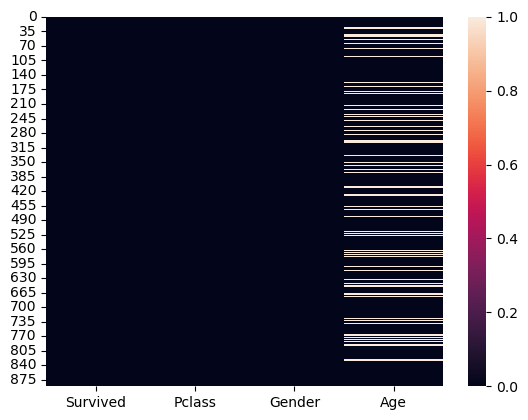

In [38]:
sns.heatmap(df.isnull())    

# Removing Redundancy / Duplicate Data

we are going to delete duplicate values. First, we will check how many duplicate entries we have.

In [41]:
count_duplicates = df[df.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 542


In [42]:
def inputAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
df['AgeNew'] = df[['Age','Pclass']].apply(inputAge, axis=1)

In [15]:
df.head(20)

,Survived,Pclass,Gender,Age,AgeNew
0,0,3,male,22.0,22.0
1,1,1,female,38.0,38.0
2,1,3,female,26.0,26.0
3,1,1,female,35.0,35.0
4,0,3,male,35.0,35.0
5,0,3,male,NaN,24.0
6,0,1,male,54.0,54.0
7,0,3,male,2.0,2.0
8,1,3,female,27.0,27.0
9,1,2,female,14.0,14.0


In [17]:
df.isnull()

,Survived,Pclass,Gender,Age,AgeNew
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


<Axes: >

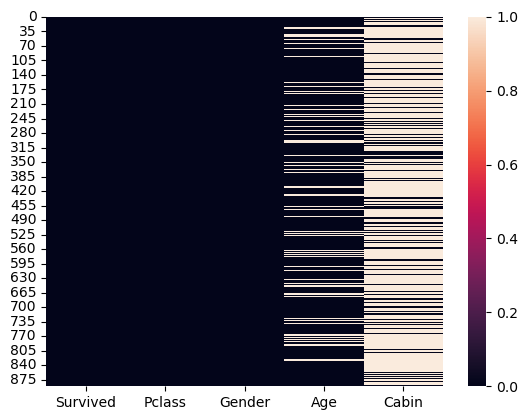

In [82]:
sns.heatmap(df.isnull())

In [17]:
df.drop(['Age'], axis=1, inplace=True)

In [18]:
df.head()

,Survived,Pclass,Gender,AgeNew
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


# Exporting data

Since the data frame we have used here is not so much complicated, we will stop here for the data cleaning process. The next step is to export the clean data.

In [19]:
df.to_csv('cleaned_Titanic.csv', index=False)

This code will write the cleaned data to a new CSV file called cleaned_data.csv in the same directory as our Python script. The index=False argument tells Pandas not to include the row index numbers in the exported data. You can modify the file name and path as needed.

In [84]:
df['Gender'].value_counts()

#df['Survived'].value_counts()

Gender
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

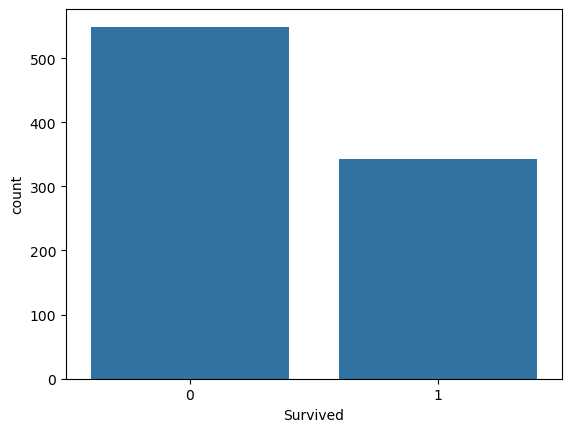

In [86]:
sns.countplot(data=df, x='Survived')

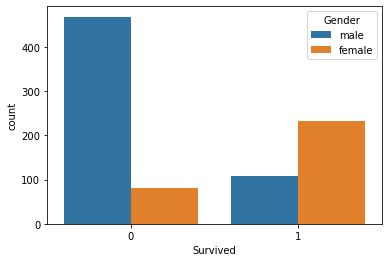

In [11]:
sns.countplot('Survived', data=df, hue='Gender')

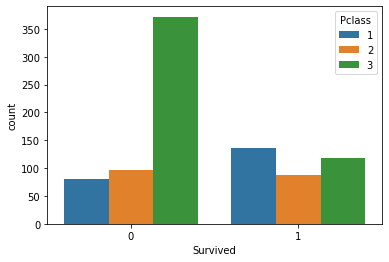

In [12]:
sns.countplot(data=df, x='Survived', hue='Pclass')

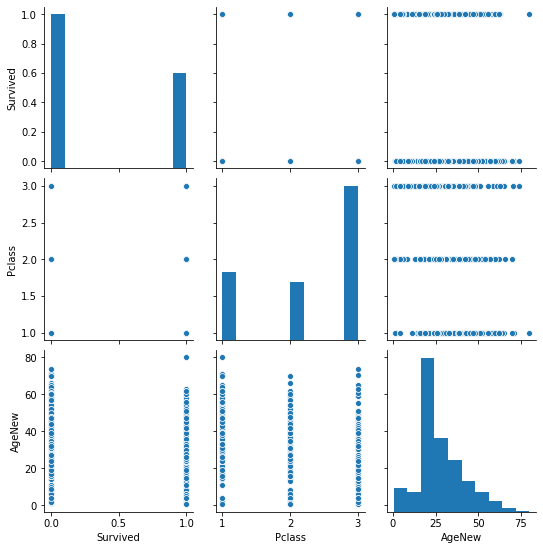

In [27]:
sns.pairplot(data=df)

In [18]:
df.corr()

,Survived,Pclass,AgeNew
Survived,1.000000,-0.338481,-0.046746
Pclass,-0.338481,1.000000,-0.411805
AgeNew,-0.046746,-0.411805,1.000000


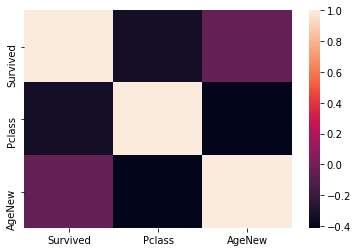

In [27]:
sns.heatmap(df.corr())